<a href="https://colab.research.google.com/github/Wahjoe45/PCVK_GENAP_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# No. 1

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# No. 2

import cv2 
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image as im

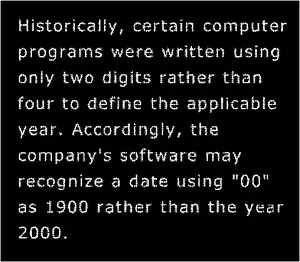

In [3]:
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 9/morphology.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


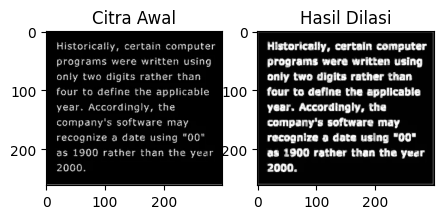

In [15]:
# No. 3

# Membaca gambar 
img = cv2.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 9/morphology.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SED) berbentuk cross 3 x 3
kernel = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)

# Menampung hasil dilasi
dilated_img = np.zeros_like(img)

# Mendapatkan ukuran gambar 
height, width = img.shape

# Looping operasi dilasi
for i in range(1, height-1):
    for j in range(1, width-1):
        # Melakukan dilasi pada setiap piksel pada gambar input
        dilated_pixel = np.max(img[i-1:i+2, j-1:j+2] + kernel)
        dilated_img[i, j] = dilated_pixel

print(kernel)

# Menampilkan perbandingan gambar awal dengan gambar hasil dilasi
fig, axs = plt.subplots(1, 2, figsize=(5, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(dilated_img, cmap='gray')
axs[1].set_title('Hasil Dilasi')
plt.show()

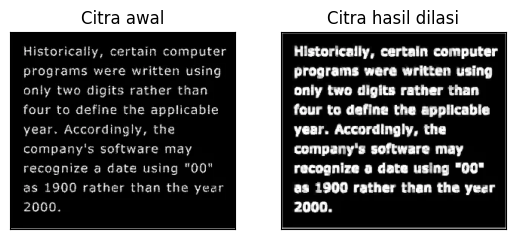

In [ ]:
# No. 4

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 9/morphology.png')

# Menentukan kernel
kernel = np.ones((3,3),np.uint8)

# Melakukan proses dilasi
dilation = cv2.dilate(img,kernel,iterations = 1)

# Menampilkan perbandingan gambar awal dengan gambar hasil dilasi
plt.subplot(121),plt.imshow(img),plt.title('Citra awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation),plt.title('Citra hasil dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


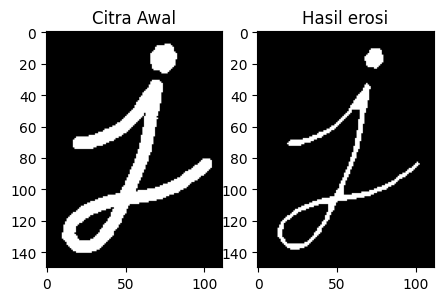

In [17]:
# No. 5

# Membaca gambar
img2 = cv2.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 9/j.png', cv2.IMREAD_GRAYSCALE)

# Menentukan kernel
kernel = np.ones((5, 5), dtype=np.uint8)

# Menampung hasil erosi
eroded_img = np.zeros_like(img2)

# Mendapatkan ukuran gambar 
height, width = img2.shape

# Looping untuk melakukan operasi erosi
for i in range(2, height-2):
    for j in range(2, width-2):
        # Melakukan erosi pada setiap piksel pada gambar 
        eroded_pixel = np.min(img2[i-2:i+3, j-2:j+3] * kernel)
        eroded_img[i, j] = eroded_pixel

print(kernel)

# Menampilkan perbandingan gambar awal dengan gambar hasil erosi
fig, axs = plt.subplots(1, 2, figsize=(5, 5))
axs[0].imshow(img2, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(eroded_img, cmap='gray')
axs[1].set_title('Hasil erosi')
plt.show()

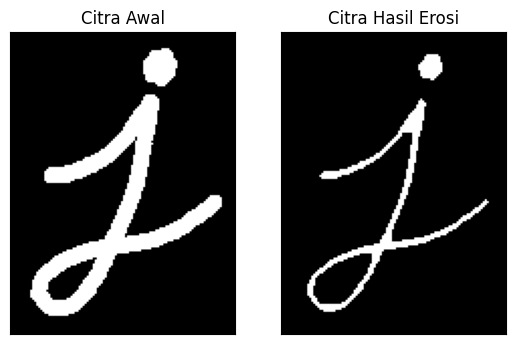

In [ ]:
# No. 6

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 9/j.png')

# Menentukan kernel
kernel = np.ones((5,5),np.uint8)

# Melakukan proses erosi
erosion = cv2.erode(img,kernel,iterations = 1)

# Menampilkan perbandingan gambar awal dengan gambar hasil erosi
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

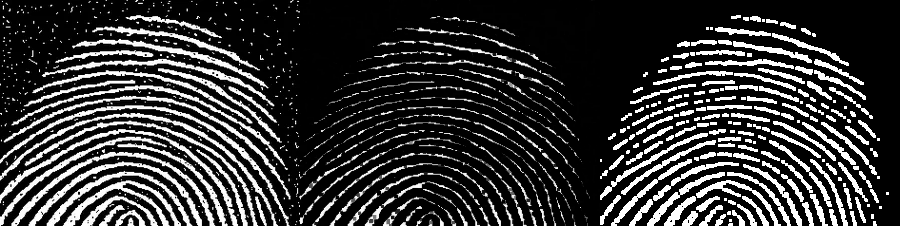

In [ ]:
# No. 7

# Membaca image
img = cv2.imread(r"/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 9/fingerprint.png", 0)

# Membinerkan gambar
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# Menentukan kernel
kernel = np.ones((3, 3), np.uint8)

# Melakukan proses opening
opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN, kernel, iterations=1)

# Melakukan proses erosi
erosion = cv2.erode(img,kernel,iterations = 1)

# Menampilkan gambar dengan urutan original -> erosi -> opening
final_frame = cv2.hconcat((img, erosion, opening))
cv2_imshow(final_frame)

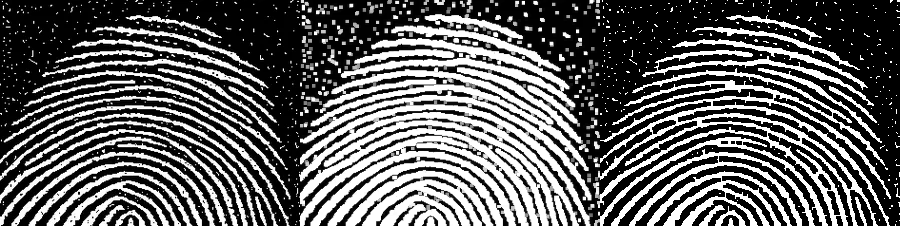

In [ ]:
# No. 8

# Membaca image
img = cv2.imread(r"/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 9/fingerprint.png", 0)

# Membinerkan gambar
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# Menentukan kernel
kernel = np.ones((3, 3), np.uint8)

# Melakukan proses closing
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)

# Melakukan proses dilasi
dilation = cv2.dilate(img,kernel,iterations = 1)

# Menampilkan gambar dengan urutan original -> dilasi -> closing
final_frame = cv2.hconcat((img, dilation, closing))
cv2_imshow(final_frame)